In [2]:
from materials import *
from matplotlib.pyplot import *

%matplotlib inline

> Imported materials!


In [3]:
air = Material("Water")

In [4]:
p = air.photon
E = p.rayleigh.E

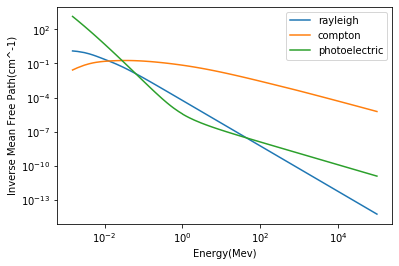

In [5]:
plot(E, p.rayleigh(E))
plot(E, p.compton(E))
plot(E, p.photoelectric(E))
legend(['rayleigh', 'compton', 'photoelectric'])
yscale('log'), xscale('log');
ylabel('Inverse Mean Free Path(cm^-1)');
xlabel('Energy(Mev)');

# Rayleigh

In [6]:
from numpy import *
from numpy.random import rand

In [7]:
prob   = p.rayleigh.prob
cum    = p.rayleigh.cum
invCum = p.rayleigh.invCum

In [16]:
import time
N = 100_000
t0 = time.perf_counter()
sample = [invCum(rand()) for _ in range(N)]
tf = time.perf_counter()

print(f"{N} samples took {tf-t0}s.")
print(f"An average of {N/(tf-t0)} samples per sec.")
print(f"Conversly, 1 sample took {(tf-t0)/N} seconds.")

100000 samples took 8.744675599999994s.
An average of 11435.529981237964 samples per sec.
Conversly, 1 sample took 8.744675599999994e-05 seconds.


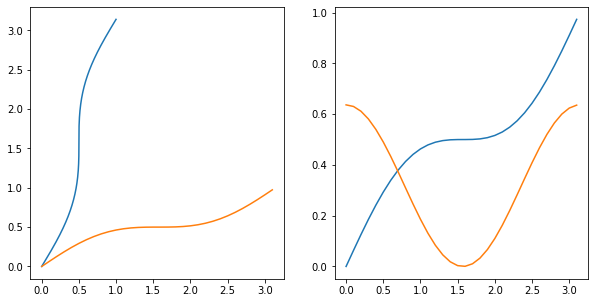

In [17]:
R = arange(0, 1, .001)
theta = arange(0, pi, .1)

figure(figsize = (10, 5))
subplot(1, 2, 1)
plot(R, invCum(R))
plot(theta, cum(theta))
subplot(1, 2, 2)
plot(theta, cum(theta))
plot(theta, prob(theta))

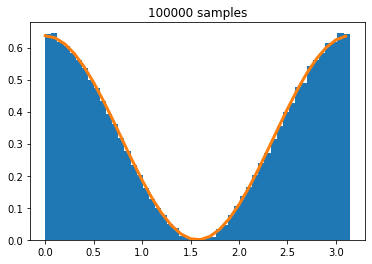

In [18]:
hist(sample, bins=50, density=True);
plot(theta, prob(theta), lw=3 )
title(f"{N} samples");

**checks out**

# Compton

In [34]:
c = p.compton
dcs10 = lambda theta: c.DCS(500, theta)

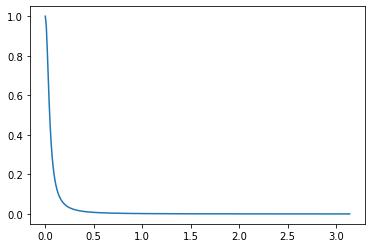

In [35]:
theta = arange(0, pi, 0.01)
plot(theta, dcs10(theta))


In [36]:
def sample():
    for _ in range(100_000):
        theta   = rand()*pi
        p_theta = dcs10(theta)
        if  rand()<p_theta:
            return(theta)
    else:
        raise RuntimeError('Exceeded loop')

In [37]:
import time
N = 50_000
t0 = time.perf_counter()
samples = [sample() for _ in range(N)]
tf = time.perf_counter()

print(f"{N} samples took {tf-t0}s.")
print(f"An average of {N/(tf-t0)} samples per sec.")
print(f"Conversly, 1 sample took {(tf-t0)/N} seconds.")

50000 samples took 54.87934419999999s.
An average of 911.0896044563158 samples per sec.
Conversly, 1 sample took 0.0010975868839999997 seconds.


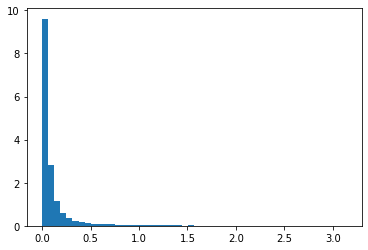

In [38]:
hist(samples, bins = 50, density = True);